In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from exo_finder.default_datasets import exo_dataset

# Statistics of stars hosting exoplanets

In [3]:
exo_db = exo_dataset.load_known_exoplanets_dataset(with_gaia_star_data=True).get_default_records()
gaia_db = exo_dataset.load_gaia_dataset_of_known_exoplanets()
exo_stars = pd.merge(exo_db.to_pandas(), gaia_db.to_pandas(), on="gaia_id", how="inner")
exo_stars

,tic_id,pl_name,pl_letter,hostname,hd_name,hip_name,default_flag,pl_refname,st_refname,sy_refname,...,spectraltype_esphs,age_flame,mass_flame,lum_flame,radius_flame,radius_gspphot,radius,teff_mean,inner_hz,outer_hz
0,328465904,CD Cet b,b,CD Cet,,,1,<a refstr=BAUER_ET_AL__2020 href=https://ui.ad...,<a refstr=BAUER_ET_AL__2020 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,M,NaN,NaN,0.003000,0.206959,0.2052,0.206080,2949.375488,0.052228,0.075242
1,399967279,TOI-2537 b,b,TOI-2537,,,1,<a refstr=HEIDARI_ET_AL__2024 href=https://ui....,<a refstr=HEIDARI_ET_AL__2024 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,K,NaN,NaN,0.295711,0.792457,0.8003,0.796378,4683.742188,0.518487,0.746958
2,399967279,TOI-2537 c,c,TOI-2537,,,1,<a refstr=HEIDARI_ET_AL__2024 href=https://ui....,<a refstr=HEIDARI_ET_AL__2024 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,K,NaN,NaN,0.295711,0.792457,0.8003,0.796378,4683.742188,0.518487,0.746958
3,380966347,HD 14787 b,b,HD 14787,HD 14787,HIP 11130,1,<a refstr=LUHN_ET_AL__2019 href=https://ui.ads...,<a refstr=LUHN_ET_AL__2019 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,K,1.658377,1.770003,13.911179,4.761981,4.7392,4.750591,5037.448242,3.556195,5.123232
4,333657795,HD 20329 b,b,HD 20329,HD 20329,HIP 15249,1,<a refstr=MURGAS_ET_AL__2022 href=https://ui.a...,<a refstr=MURGAS_ET_AL__2022 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,G,8.046681,0.973023,1.152119,1.079703,1.1045,1.092102,5552.242676,1.023416,1.474384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,271898990,HATS-15 b,b,HATS-15,,,1,<a refstr=CICERI_ET_AL__2016 href=https://ui.a...,<a refstr=CICERI_ET_AL__2016 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,K,NaN,0.947004,1.416533,1.594304,1.0896,1.341952,4881.470215,1.134794,1.634840
5159,71841620,WASP-68 b,b,WASP-68,HD 193334,,1,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,G,NaN,NaN,NaN,NaN,NaN,NaN,5747.763184,NaN,NaN
5160,68952448,WASP-67 b,b,WASP-67,,,1,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,K,12.967495,0.834074,0.545393,0.905590,0.9026,0.904095,5169.685547,0.704139,1.014418
5161,442530946,WASP-70 A b,b,WASP-70 A,HD 358155,,1,<a refstr=ANDERSON_ET_AL__2014 href=https://ui...,<a refstr=ANDERSON_ET_AL__2014 href=https://ui...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,G,11.810555,0.953842,1.487124,1.259460,1.2266,1.243030,5726.088867,1.162726,1.675080


#### Scatter of stars in relation of their habitable zone

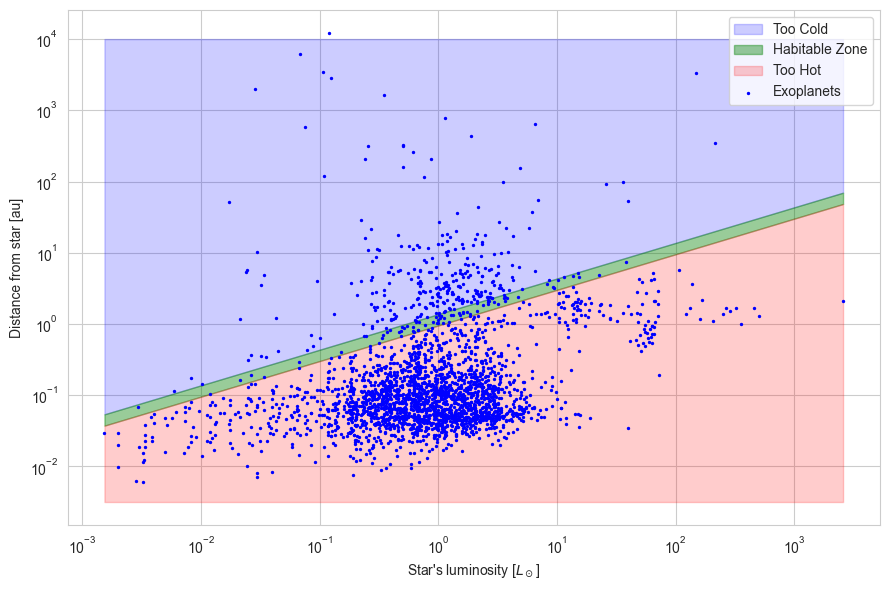

In [4]:
def plot_habitable_zone(ax):
    """
    Visualizes exoplanets and their position relative to the habitable zone.
    ref: https://www.planetarybiology.com/calculating_habitable_zone.html
    """
    
    # Remove rows with NaNs in relevant columns
    valid_data = exo_stars.dropna(subset=["pl_orbsmax", "inner_hz", "outer_hz"])
    magnitudes = valid_data["lum_flame"]
    
    # Plot the habitable zone regions
    mags = np.linspace(magnitudes.min(), magnitudes.max(), 100)
    inners = np.sqrt(mags/1.1)
    outers = np.sqrt(mags/0.53)
    
    ax.fill_between(mags, outers, 1e4, color='blue', alpha=0.2, label="Too Cold")
    ax.fill_between(mags, inners, outers, color='green', alpha=0.4, label="Habitable Zone")
    ax.fill_between(mags, 10**-2.5, inners, color='red', alpha=0.2, label="Too Hot")
    
    ax.scatter(magnitudes, valid_data["pl_orbsmax"], color='blue', label="Exoplanets", s=2)
    ax.set(
        xlabel=r"Star's luminosity [$L_\odot$]",
        ylabel="Distance from star [au]",
        yscale="log",
        xscale="log",
        # title="Exoplanets and the Habitable Zone",
    )
    ax.legend(loc='upper right')
    
plt.figure(figsize=(9, 6))
plot_habitable_zone(ax=plt.gca())
plt.tight_layout()
plt.show()


## Distribution of stellar parameters

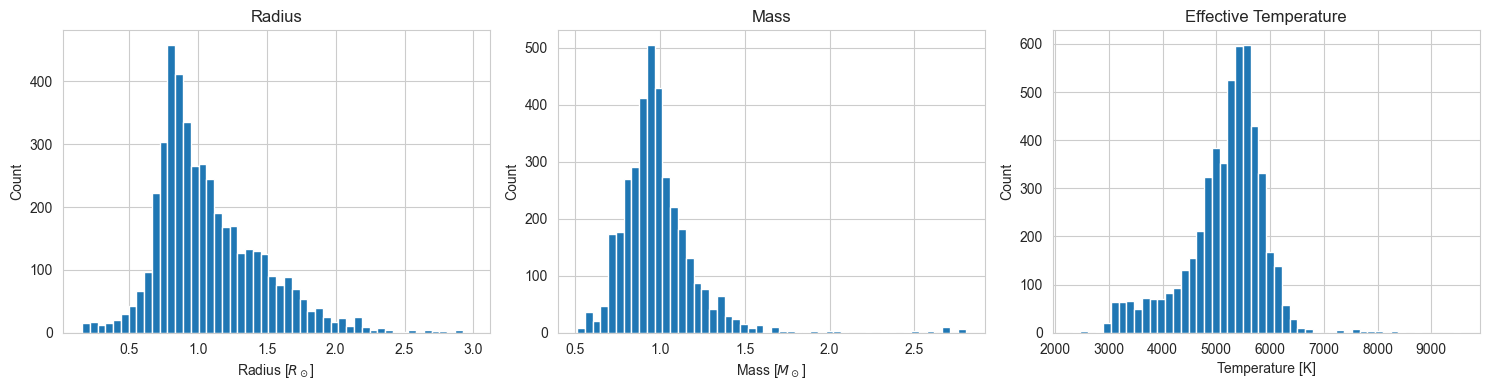

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

def star_radius_distribution(ax):
    data = exo_stars["radius"].dropna().values
    data = data[data < np.quantile(data, 0.97)]
    ax.hist(data, bins=50)
    ax.set(title="Radius", xlabel=r"Radius [$R_\odot$]", ylabel="Count")

def star_mass_distribution(ax):
    data = exo_stars["mass_flame"].dropna().values
    data = data[data < np.quantile(data, 0.99)]
    ax.hist(data, bins=50)
    ax.set(title="Mass", xlabel=r"Mass [$M_\odot$]", ylabel="Count")

def star_temperature_distribution(ax):
    data = exo_stars["teff_mean"].dropna()
    ax.hist(data, bins=50)
    ax.set(title="Effective Temperature", xlabel=r"Temperature [K]", ylabel="Count")


star_radius_distribution(axes[0])
star_mass_distribution(axes[1])
star_temperature_distribution(axes[2])

# plt.suptitle("Distribution of stellar parameters")
plt.tight_layout()
plt.show()

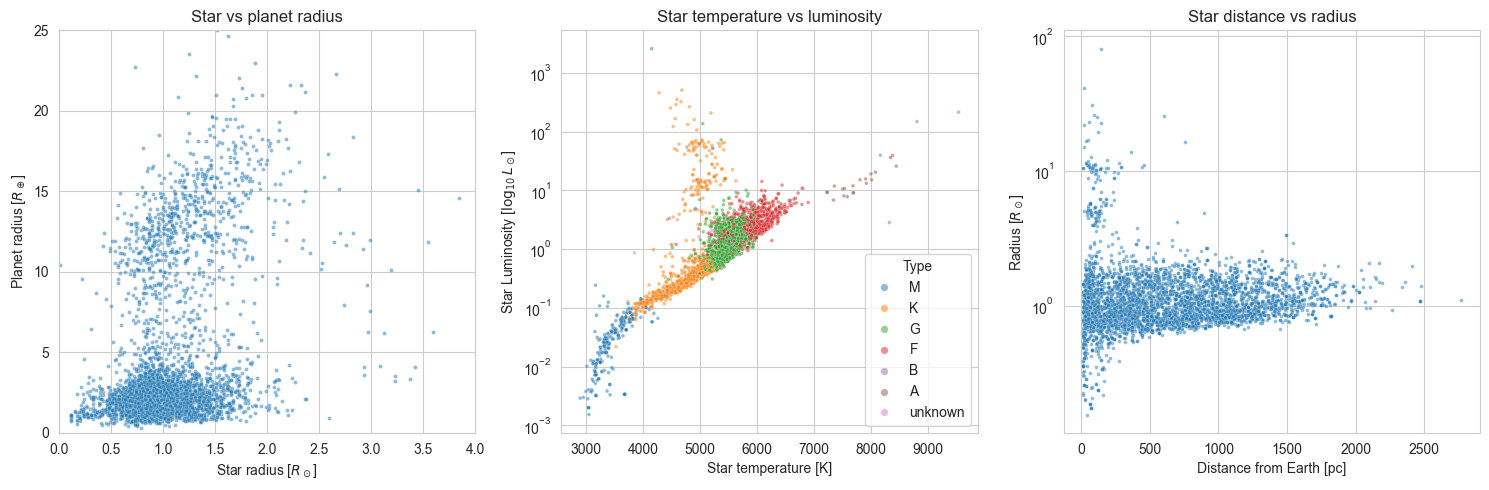

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def star_radius_planet_radius(ax):
    star_radii = exo_stars[["st_rad", "st_rad_gaia"]].mean(axis=1)
    pl_radii = exo_stars["pl_rade"]
    
    sns.scatterplot(x=star_radii, y=pl_radii, ax=ax, alpha=0.5, s=8)
    ax.set(title="Star vs planet radius", xlim=(0, 4), ylim=(0, 25), xlabel=r"Star radius [$R_\odot$]", ylabel=r"Planet radius [$R_\oplus$]")

def star_temp_mass(ax):
    masses = exo_stars[["mass_flame", "st_mass"]].mean(axis=1)
    sns.scatterplot(exo_stars, x="teff_mean", y=masses, hue="spectraltype_esphs", ax=ax, alpha=0.5, s=7)
    ax.set(title="Star temperature vs mass", xlabel=r"Star temperature [K]", ylim=(0, 3), ylabel=r"Star Mass [$M_\odot$]")
    ax.legend(title="Type", markerscale=2)

def star_temp_lum(ax):
    data = exo_stars[["teff_mean", "lum_flame", "spectraltype_esphs"]].dropna()
    sns.scatterplot(data, x="teff_mean", y="lum_flame", hue="spectraltype_esphs", ax=ax, alpha=0.5, s=7)
    ax.set(title="Star temperature vs luminosity", xlabel=r"Star temperature [K]", ylabel=r"Star Luminosity [$\log_{10}L_\odot$]", yscale="log")
    ax.legend(title="Type", markerscale=2)

def star_distance_luminosity(ax):
    sns.scatterplot(exo_stars, x="distance_msc", y="radius", ax=ax, alpha=0.5, s=7)
    ax.set(title="Star distance vs radius", yscale="log", xlabel="Distance from Earth [pc]", ylabel=r"Radius [$R_\odot$]")

star_radius_planet_radius(axes[0])
star_temp_lum(axes[1])
star_distance_luminosity(axes[2])

# plt.suptitle("Relation of stellar and planetary parameters")
plt.tight_layout()
plt.show()